***SVM***
<br></br>
读取手写体数字数据

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

对数据进行分割,获取75%的训练数据和25%的测试样本

In [20]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.25,random_state = 33)

print y_train.shape
print y_test.shape

(1347,)
(450,)


使用支持向量机对手写体数字图像进行识别
        <br></br>
为了数据归一化（使特征数据方差为1，均值为0），我们需要计算特征数据的均值μ和方差σ^2，再使用下面的公式进行归一化：
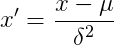
我们在训练集上调用fit_transform()，其实找到了均值μ和方差σ^2，即我们已经找到了转换规则，我们把这个规则利用在训练集上，同样，我们可以直接将其运用到测试集上（甚至交叉验证集），所以在测试集上的处理，我们只需要标准化数据而不需要再次拟合数据。用一幅图展示如下：
![avatar](https://i.stack.imgur.com/PiaIX.png)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print X_train.shape
print X_test.shape

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
y_predict = lsvc.predict(X_test)

(1347, 64)
(450, 64)


支持向量机(分类)模型对手写体数码图像识别能力的评估

In [23]:
print 'Accuracy',lsvc.score(X_test,y_test)

from sklearn.metrics import classification_report

print classification_report(y_test,y_predict,target_names = digits.target_names.astype(str))

Accuracy 0.9533333333333334
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        35
          1       0.96      0.98      0.97        54
          2       0.98      1.00      0.99        44
          3       0.93      0.93      0.93        46
          4       0.97      1.00      0.99        35
          5       0.94      0.94      0.94        48
          6       0.96      0.98      0.97        51
          7       0.92      1.00      0.96        35
          8       0.98      0.84      0.91        58
          9       0.95      0.91      0.93        44

avg / total       0.95      0.95      0.95       450

